In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Conceptual  

**1 (a)**:  
When performing best subset selection, the model with $k$ predictors is the model with the smallest *training* RSS among all $C_p^k$ models with $k$ predictors.  

**1 (b)**:  
This is difficult to answer. On one hand, best subset selection may have the smallest test RSS because it considers many more models than forward or backward selection. On the other hand, forward or backward selection may yield a model with smaller test RSS by sheer luck.  

**1 (c)**:  

**i.** *True* - Once a variable is added to the model in forward selection, it stays there. So when selecting the $k+1$ variable which minimizes the RSS, the previously added variables from the $k$ variable model are already included (i.e. the predictors in the $k$ variable model are a subset of the predictors in the $k+1$-variable model).  
  
**ii.** *True* - The model with $k$ predictors is obtained by removing a single variable from the $k+1$ model. So all the predictors in the $k$ variable model are contained in the $k+1$ variable model  

**iii.** *False* - Because backward elimination starts with a model that includes all variables and removes them one-at-a-time and forward selection starts with a single variable model and adds variables one-at-a-time, there is absolutely no guarantee that the variables used in the $k$ variable model for forward and backward selection will be the same.  

**iv.** *False* - This answer follows the same logic as **1 (c) iii**.  

**v.** *False* - For each $k$, best subset selection searches through all $C_p^k$ models to find the one with the lowest RSS. While there is a good chance that the $k$ variables will be a subset of the $k+1$ model, it is not guaranteed.

**2 (a)**:  
The lasso is less flexible than least squares (because some coefficients will be set to exactly zero) and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance.  

**2 (b)**:  
Similar to the lasso, ridge regression is less flexible and will give improved prediction accuracy when its increase in bias is less than its decrease in variance.  

**2 (c)**:  
Non-linear methods are more flexible than least squares and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias.

**3 (a)**:  
*Steadily decrease* - as we increase $s$ from 0, we are imposing less restrictions on the coefficients $\beta_j$ which will increase and produce a more flexible model. More flexible models tend to decrease the training RSS.  

**3 (b)**:  
*Decrease initially, and then eventually start increasing in a U shape* - as we increase $s$ from 0, we are imposing less restrictions on the coefficients $\beta_j$ which will increase and produce a more flexible model. More flexible models tend to decrease the test RSS up to a certain point an then increase due to overfitting.  

**3 (c)**:  
*Steadily increase* - as we increase $s$ from 0, we are imposing less restrictions on the coefficients $\beta_j$ which will increase and produce a more flexible model. As model flexibility increases, so does variance.  

**3 (d)**:  
*Steadily decrease* - as we increase $s$ from 0, we are imposing less restrictions on the coefficients $\beta_j$ which will increase and produce a more flexible model. As model flexibility increases, (squared) bias decreases.  

**3 (e)**:  
*Remain constant* - By definition the irreducible error is independent of the model, and consequently independent of $s$.

**4 (a)**:  
*Steadily increase* - as we increase $\lambda$ from 0, we are imposing more and more restrictions on the coefficients $\beta_j$ which will decrease towards zero and produce a less flexible model. Less flexible models tend to increase the training RSS. (Least squares will have the lowest training RSS)

**4 (b)**:  
*Decrease initially, and then eventually start increase in a U shape* - when $\lambda=0$, the coefficients are the same as in least squares. As $\lambda$ increases from 0, the $\beta$s start decreasing towards zero, reducing some of the overfitting (test RSS decreases). Eventually, as $\lambda \to \infty$, the $\beta$s approach 0 and the model becomes too inflexible, thus the test RSS will increase.  

**4 (c)**:  
*Steadily decrease* - as we increase $\lambda$ from zero, we are imposing more and more restrictions on the coefficients $\beta_j$ which will decrease towards zero and produce a less flexible model. Less flexible models tend to decrease variance.  

**4 (d)**:  
*steadily increase* - as we increase $\lambda$ from zero, we are imposing more and more restrictions on the coefficients $\beta_j$ which will decrease towards zero and produce a less flexible model. Less flexible models tend to increase (squared) bias.  

**4 (e)**:  
*Remain constant* - By definition the irreducible error is independent of the model, and consequently independent of $\lambda$.

**5 (a)**:  
For ridge regression we need to minimize this equation  

$$\sum_{i=1}^n\bigl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\bigr)^2 + \lambda\sum_{j=1}^p\beta_j^2$$  

In this setting, $\beta_0=0$ and $n=p=2$. In this case we need to minimize  

$$\sum_{i=1}^2\bigl(y_i - \sum_{j=1}^2\beta_jx_{ij}\bigr)^2 + \lambda\sum_{j=1}^2\beta_j^2$$  

Evaluating the summations, we are left with this to minimize

$$(y_1 - \widehat{\beta}_1x_{11} - \widehat{\beta}_2x_{12})^2 + (y_2 - \widehat{\beta}_1x_{21} - \widehat{\beta}_2x_{22})^2 + \lambda(\widehat{\beta}_1^2+\widehat{\beta}_2^2)$$  

And since $x_{11}=x_{12}=x_1$ and $x_{21}=x_{22}=x_2$ we can rewrite the above equation as  

$$(y_1 - \widehat{\beta}_1x_1 - \widehat{\beta}_2x_1)^2 + (y_2 - \widehat{\beta}_1x_2 - \widehat{\beta}_2x_2)^2 + \lambda(\widehat{\beta}_1^2+\widehat{\beta}_2^2)$$ 

**5 (b)**:  
Now we take the derivative of the above equation with respect to $\widehat{\beta}_1$ and $\widehat{\beta}_2$ and set them equal to zero. Let's start with $\frac{d}{d\widehat{\beta}_1}$  

$$-2x_1(y_1-\widehat{\beta}_1x_1-\widehat{\beta}_2x_1)-2x_2(y_2-\widehat{\beta}_1x_2-\widehat{\beta}_2x_2)+2\lambda\widehat{\beta}_1=0$$  

Rearranging we get  

$$\widehat{\beta}_1(x_1^2 + x_2^2 + \lambda) + \widehat{\beta}_2(x_1^2 + x_2^2)=x_1y_1+x_2y_2$$  

Similarly, for $\frac{d}{d\widehat{\beta}_2}$ we get  

$$\widehat{\beta}_1(X_1^2+x_2^2) + \widehat{\beta}_2(x_1^2+x_2^2+\lambda)=x_1y_1+x_2y_2$$

Subtracting these equations we are left with  

$$\widehat{\beta}_1\lambda - \widehat{\beta}_2\lambda=0$$  

So we can see that  

$$\widehat{\beta}_1=\widehat{\beta}_2$$  

**5 (c)**:  
For the lasso we need to minimize this equation  

$$\sum_{i=1}^n\bigl(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij}\bigr)^2 + \lambda\sum_{j=1}^p\lvert\beta_j\rvert$$  

In this setting, $\beta_0=0$ and $n=p=2$. In this case we need to minimize  

$$\sum_{i=1}^2\bigl(y_i - \sum_{j=1}^2\beta_jx_{ij}\bigr)^2 + \lambda\sum_{j=1}^2\lvert\beta_j\rvert$$  

Evaluating the summations, we are left with this to minimize  

$$(y_1 - \widehat{\beta}_1x_{11} - \widehat{\beta}_2x_{12})^2 + (y_2 - \widehat{\beta}_1x_{21} - \widehat{\beta}_2x_{22})^2 + \lambda(\lvert\widehat{\beta}_1\rvert+\lvert\widehat{\beta}_2\rvert)$$  

And since $x_{11}=x_{12}=x_1$ and $x_{21}=x_{22}=x_2$ we can rewrite the above equation as  

$$(y_1 - \widehat{\beta}_1x_1 - \widehat{\beta}_2x_1)^2 + (y_2 - \widehat{\beta}_1x_2 - \widehat{\beta}_2x_2)^2 + \lambda(\lvert\widehat{\beta}_1\rvert+\lvert\widehat{\beta}_2\rvert)$$  

We can use the alternative form of the lasso optimization problem  

$$(y_1 - \widehat{\beta}_1x_1 - \widehat{\beta}_2x_1)^2 + (y_2 - \widehat{\beta}_1x_2 - \widehat{\beta}_2x_2)^2 \qquad\text{subject to}\qquad\lvert\widehat{\beta}_1\rvert+\lvert\widehat{\beta}_2\rvert\le s$$  

In this setting $x_1+x_2=0$ which means that $x_2 = -x_1$ and $x_2^2=x_1^2$. Similarly, $y_1+y_2=0$ means that $y_2=-y_1$ and $y_2^2=y_1^2$. Expanding the equation above, substituting the identities, and rearraning we are left with this expression to minimize  

$$2\bigl(y_1-x_1(\widehat{\beta}_1+\widehat{\beta}_2)\bigr)^2$$  

which has a simple solution of $\widehat{\beta}_1 + \widehat{\beta}_2=\frac{y1}{x1}$. This is a line parallel to the edge of the lasso diamond $\widehat{\beta}_1+\widehat{\beta}_2=s$. Solutions to the lasso optimization are contours of the function $(y_1-x_1(\widehat{\beta}_1+\widehat{\beta}_2)^2$ that touch the lasso diamond. As $\widehat{\beta}_1$ and $\widehat{\beta}_2$ vary along the line $\widehat{\beta}_1 + \widehat{\beta}_2=\frac{y1}{x1}$, these contours touch the lasso diamond edge $\widehat{\beta}_1+\widehat{\beta}_2=s$ at different points. As a result, the entire edge $\widehat{\beta}_1+\widehat{\beta}_2=s$ is a potential solution to the lasso optimization problem. A similar argument can be made for the opposite lasso diamond edge $\widehat{\beta}_1+\widehat{\beta}_2=-s$.  

Thus this lasso problem does not have a single, unique solution. Instead, the general form for the solution is given by two line segments:  

$$\widehat{\beta}_1 + \widehat{\beta}_2=\begin{cases}
s & \text{with }\widehat{\beta}_1, \widehat{\beta}_2\ge 0\\
-s & \text{with }\widehat{\beta}_1, \widehat{\beta}_2\le 0
\end{cases}$$

**6 (a)**:

1.0
0.990990990991


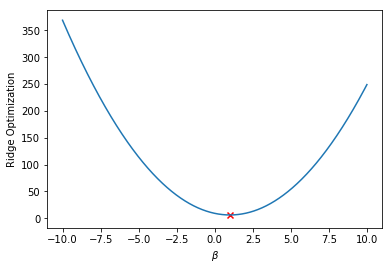

In [2]:
y = 3
lam = 2
beta = np.linspace(-10, 10, 1000)
ridge = (y - beta)**2 + lam * beta**2

fig, ax = plt.subplots(1, 1)
ax.plot(beta, ridge)
ax.scatter(beta[ridge.argmin()], ridge[ridge.argmin()], c='r', marker='x')
ax.set(xlabel=r'$\beta$', ylabel='Ridge Optimization');

print(y/(1+lam))
print(beta[ridge.argmin()])

We can see that the function is minimized at $\beta=\frac{y}{1+\lambda}$.

**6 (b)**:

2.0
1.99199199199


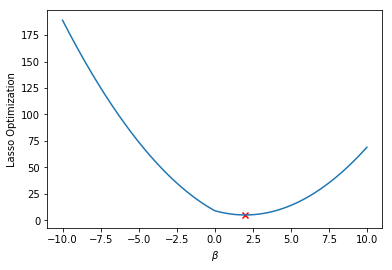

In [3]:
lasso = (y - beta)**2 + lam * abs(beta)
fig, ax = plt.subplots(1, 1)
ax.plot(beta, lasso)
ax.scatter(beta[lasso.argmin()], lasso[lasso.argmin()], c='r', marker='x')
ax.set(xlabel=r'$\beta$', ylabel='Lasso Optimization');

print(y-lam/2)
print(beta[lasso.argmin()])

We can see that the function is minimized at $\beta=y-\lambda/2$ since $y\gt \lambda/2$.

**7 (a)**: *This answer is taken directly from [here](http://blog.princehonest.com/stat-learning/ch6/7.html 'here'). I don't quite follow all of it*.  

The likelihood for the data is  

$$ \begin{aligned} 
L(\theta \mid \beta) &= p(\beta \mid \theta) \\
&= p(\beta_1 \mid \theta) \times \cdots \times p(\beta_n \mid \theta) \\ 
&= \prod_{i = 1}^{n} p(\beta_i \mid \theta) \\ 
&= \prod_{i = 1}^{n} \frac{ 1 }{ \sigma \sqrt{2\pi} } \exp \left(- \frac{ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) }{ 2\sigma^2 } \right) \\ 
&= \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 \right) \end{aligned} $$  

**7 (b)**:  
The posterior with double exponential (Laplace Distribution) with mean 0 and common scale parameter $b$, i.e. $p(\beta) = \frac{1}{2b}\exp(- \lvert \beta \rvert / b)$ is:

$$ f(\beta \mid X, Y) \propto f(Y \mid X, \beta) p(\beta \mid X) = f(Y \mid X, \beta) p(\beta) $$

Substituting our values from (a) and our density function gives us:

$$ \begin{aligned} f(Y \mid X, \beta)p(\beta) &= \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 \right) \left( \frac{ 1 }{ 2b } \exp(- \lvert \beta \rvert / b) \right) \\ &= \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ 2b } \right) \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 - \frac{ \lvert \beta \rvert }{ b } \right) \end{aligned} $$  

**7 (c)**:  
Showing that the Lasso estimate for $\beta$ is the mode under this posterior distribution is the same thing as showing that the most likely value for $\beta$ is given by the lasso solution with a certain $\lambda$.

We can do this by taking our likelihood and posterior and showing that it can be reduced to the canonical Lasso Equation 6.7 from the book.

Let's start by simplifying it by taking the logarithm of both sides:

$$ \begin{aligned} \log f(Y \mid X, \beta)p(\beta) &= \log \left[ \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ 2b } \right) \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 - \frac{ \lvert \beta \rvert }{ b } \right) \right] \\ &= \log \left[ \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ 2b } \right) \right] - \left( \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ \lvert \beta \rvert }{ b } \right) \end{aligned} $$

We want to maximize the posterior, this means: $$ \begin{aligned} \arg\max_\beta , f(\beta \mid X, Y) &= \arg\max_\beta , \log \left[ \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ 2b } \right) \right] - \left( \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ \lvert \beta \rvert }{ b } \right) \ \end{aligned} $$

Since we are taking the difference of two values, the maximum of this value is the equivalent to taking the difference of the second value in terms of $\beta$. This results in:

$$ \begin{aligned} &= \arg\min_\beta , \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ \lvert \beta \rvert }{ b } \\ &= \arg\min_\beta , \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ 1 }{ b } \sum_{j = 1}^{p} \lvert \beta_j \rvert \\ &= \arg\min_\beta , \frac{ 1 }{ 2\sigma^2 } \left( \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ 2\sigma^2 }{ b } \sum_{j = 1}^{p} \lvert \beta_j \rvert \right) \end{aligned} $$

By letting $\lambda = 2\sigma^2/b$, we can see that we end up with:

$$ \begin{aligned} &= \arg\min_\beta , \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \lambda \sum_{j = 1}^{p} \lvert \beta_j \rvert \\ &= \arg\min_\beta , \text{RSS} + \lambda \sum_{j = 1}^{p} \lvert \beta_j \rvert \end{aligned} $$

which we know is the Lasso from Equation 6.7 in the book. Thus we know that when the posterior comes from a Laplace distribution with mean zero and common scale parameter $b$, the mode for $\beta$ is given by the Lasso solution when $\lambda = 2\sigma^2 / b$.  

**7 (d)**:  
The posterior distributed according to Normal distribution with mean 0 and variance $c$ is:

$$ \begin{aligned} f(\beta \mid X, Y) \propto f(Y \mid X, \beta) p(\beta \mid X) = f(Y \mid X, \beta) p(\beta) \end{aligned} $$

Our probability distribution function then becomes: $$ p(\beta) = \prod_{i = 1}^{p} p(\beta_i) = \prod_{i = 1}^{p} \frac{ 1 }{ \sqrt{ 2c\pi } } \exp \left( - \frac{ \beta_i^2 }{ 2c } \right) = \left( \frac{ 1 }{ \sqrt{ 2c\pi } } \right)^p \exp \left( - \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) $$

Substituting our values from (a) and our density function gives us:

$$ \begin{aligned} f(Y \mid X, \beta)p(\beta) &= \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 \right) \left( \frac{ 1 }{ \sqrt{ 2c\pi } } \right)^p \exp \left( - \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) \\ &= \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ \sqrt{ 2c\pi } } \right)^p \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 - \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) \end{aligned} $$  

**7 (e)**:  
Like from part c, showing that the Ridge Regression estimate for $\beta$ is the mode and mean under this posterior distribution is the same thing as showing that the most likely value for $\beta$ is given by the lasso solution with a certain $\lambda$.

We can do this by taking our likelihood and posterior and showing that it can be reduced to the canonical Ridge Regression Equation 6.5 from the book.

Let's start by simplifying it by taking the logarithm of both sides:

Once again, we can take the logarithm of both sides to simplify it:

$$ \begin{aligned} \log f(Y \mid X, \beta)p(\beta) &= \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ \sqrt{ 2c\pi } } \right)^p \exp \left( - \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 - \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) \\ &= \log \left[ \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ \sqrt{ 2c\pi } } \right)^p \right] - \left( \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) \end{aligned} $$

We want to maximize the posterior, this means: $$ \begin{aligned} \arg\max_\beta , f(\beta \mid X, Y) &= \arg\max_\beta , \log \left[ \left( \frac{ 1 }{ \sigma \sqrt{2\pi} } \right)^n \left( \frac{ 1 }{ \sqrt{ 2c\pi } } \right)^p \right] - \left( \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) \end{aligned} $$

Since we are taking the difference of two values, the maximum of this value is the equivalent to taking the difference of the second value in terms of $\beta$. This results in:

$$ \begin{aligned} &= \arg\min_\beta , \left( \frac{ 1 }{ 2\sigma^2 } \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ 1 }{ 2c } \sum_{i = 1}^{p} \beta_i^2 \right) \\ &= \arg\min_\beta , \left( \frac{ 1 }{ 2\sigma^2 } \right) \left( \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \frac{ \sigma^2 }{ c } \sum_{i = 1}^{p} \beta_i^2 \right) \end{aligned} $$

By letting $\lambda = \sigma^2/ c$, we end up with:

$$ \begin{aligned} &= \arg\min_\beta , \left( \frac{ 1 }{ 2\sigma^2 } \right) \left( \sum_{i = 1}^{n} \left[ Y_i - (\beta_0 + \sum_{j = 1}^{p} \beta_j X_{ij}) \right]^2 + \lambda \sum_{i = 1}^{p} \beta_i^2 \right) \\ &= \arg\min_\beta , \text{RSS} + \lambda \sum_{i = 1}^{p} \beta_i^2 \end{aligned} $$

which we know is the Ridge Regression from Equation 6.5 in the book. Thus we know that when the posterior comes from a normal distribution with mean zero and variance $c$, the mode for $\beta$ is given by the Ridge Regression solution when $\lambda = \sigma^2 / c$. Since the posterior is Gaussian, we also know that it is the posterior mean.

## Applied  

**8 (a)**:

In [4]:
np.random.seed(123)

X = np.random.normal(size=100)
eps = np.random.normal(size=100)

**8 (b)**:

In [5]:
y = 2 + 4 * X - 3 * X**2 + 0.5 * X**3 + eps

**8 (c)**:

/Users/tsansom/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


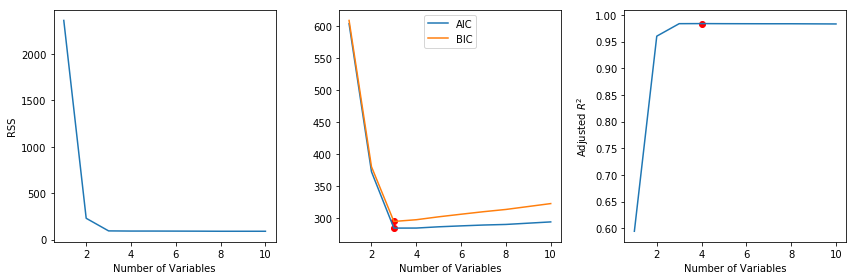

In [6]:
from sklearn.preprocessing import PolynomialFeatures as poly
import itertools
import statsmodels.api as sm

p = poly(10)
X_poly = p.fit_transform(X.reshape(-1, 1))

bss_models = {}

for i in range(1, X_poly.shape[1]):
    ctr = 0
    min_rss = 1e100
    for combo in itertools.combinations(range(1, X_poly.shape[1]), i):
        lr = sm.OLS(y, X_poly[:, [0] + list(combo)]).fit()
        calc_rss = ((lr.predict() - y)**2).sum()
        if calc_rss < min_rss:
            min_rss = calc_rss
            min_model = lr
        ctr += 1
    bss_models[i] = [min_model, min_rss]

aic, bic, adj_r2, rss = np.array([]), np.array([]), np.array([]), np.array([])
for i in bss_models.keys():
    aic = np.append(aic, bss_models[i][0].aic)
    bic = np.append(bic, bss_models[i][0].bic)
    adj_r2 = np.append(adj_r2, bss_models[i][0].rsquared_adj)
    rss = np.append(rss, bss_models[i][1])
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

indices = sorted(list(bss_models.keys()))

ax1.plot(indices, rss)
ax1.set(xlabel='Number of Variables', ylabel='RSS')

ax2.plot(indices, aic)
ax2.plot(indices, bic)
ax2.legend(['AIC', 'BIC'], loc=9)
ax2.scatter(aic.argmin()+1, aic[aic.argmin()], c='r')
ax2.scatter(bic.argmin()+1, bic[bic.argmin()], c='r')
ax2.set(xlabel='Number of Variables')

ax3.plot(indices, adj_r2)
ax3.scatter(adj_r2.argmax()+1, adj_r2[adj_r2.argmax()], c='r')
ax3.set(xlabel='Number of Variables', ylabel=r'Adjusted $R^2$');

fig.tight_layout()

**8 (d)**:

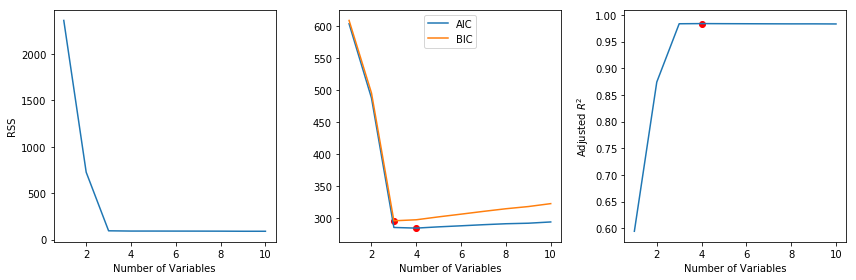

In [7]:
unused_vars = list(range(1, X_poly.shape[1]))
model_vars = []
fs_models = {}

for i in range(1, X_poly.shape[1]):
    min_rss = 1e100
    for v in unused_vars:
        lr = sm.OLS(y, X_poly[:, [0] + list(model_vars) + [v]]).fit()
        calc_rss = ((lr.predict() - y)**2).sum()
        if calc_rss < min_rss:
            min_rss = calc_rss
            min_model = lr
            min_var = v
    model_vars.append(min_var)
    unused_vars.remove(min_var)
    fs_models[i] = [min_model, min_rss]
    
aic, bic, adj_r2, rss = np.array([]), np.array([]), np.array([]), np.array([])
for i in fs_models.keys():
    aic = np.append(aic, fs_models[i][0].aic)
    bic = np.append(bic, fs_models[i][0].bic)
    adj_r2 = np.append(adj_r2, fs_models[i][0].rsquared_adj)
    rss = np.append(rss, fs_models[i][1])
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

indices = sorted(list(fs_models.keys()))

ax1.plot(indices, rss)
ax1.set(xlabel='Number of Variables', ylabel='RSS')

ax2.plot(indices, aic)
ax2.plot(indices, bic)
ax2.legend(['AIC', 'BIC'], loc=9)
ax2.scatter(aic.argmin()+1, aic[aic.argmin()], c='r')
ax2.scatter(bic.argmin()+1, bic[bic.argmin()], c='r')
ax2.set(xlabel='Number of Variables')

ax3.plot(indices, adj_r2)
ax3.scatter(adj_r2.argmax()+1, adj_r2[adj_r2.argmax()], c='r')
ax3.set(xlabel='Number of Variables', ylabel=r'Adjusted $R^2$');

fig.tight_layout()

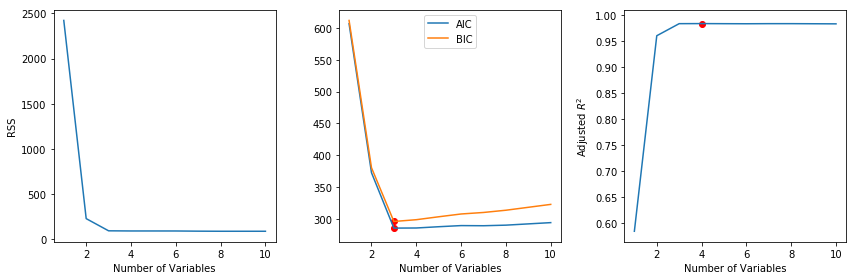

In [33]:
model_vars = pd.Index(list(range(1, X_poly.shape[1])))
omitted_vars = []
bs_models = {}

for i in range(len(model_vars), 0, -1):
    lr = sm.OLS(y, X_poly[:, [0] + list(model_vars)]).fit()
    calc_rss = ((lr.predict() - y)**2).sum()
    bs_models[i] = [lr, calc_rss]
    min_rss = 1e100
    if len(model_vars) > 1:
        for v in model_vars:
            lr = sm.OLS(y, X_poly[:, [0] + list(model_vars.drop(v))]).fit()
            calc_rss = ((lr.predict() - y)**2).sum()
            if calc_rss < min_rss:
                min_rss = calc_rss
                min_var = v
        model_vars = model_vars.drop(min_var)
        
aic, bic, adj_r2, rss = np.array([]), np.array([]), np.array([]), np.array([])
for i in bs_models.keys():
    aic = np.append(aic, bs_models[i][0].aic)
    bic = np.append(bic, bs_models[i][0].bic)
    adj_r2 = np.append(adj_r2, bs_models[i][0].rsquared_adj)
    rss = np.append(rss, bs_models[i][1])
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

indices = sorted(list(bs_models.keys()))

ax1.plot(indices, rss)
ax1.set(xlabel='Number of Variables', ylabel='RSS')

ax2.plot(indices, aic)
ax2.plot(indices, bic)
ax2.legend(['AIC', 'BIC'], loc=9)
ax2.scatter(aic.argmin()+1, aic[aic.argmin()], c='r')
ax2.scatter(bic.argmin()+1, bic[bic.argmin()], c='r')
ax2.set(xlabel='Number of Variables')

ax3.plot(indices, adj_r2)
ax3.scatter(adj_r2.argmax()+1, adj_r2[adj_r2.argmax()], c='r')
ax3.set(xlabel='Number of Variables', ylabel=r'Adjusted $R^2$');

fig.tight_layout()

**8 (e)**:  

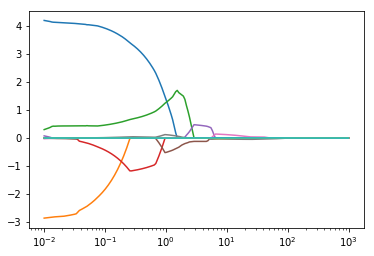

In [78]:
from sklearn.linear_model import Lasso, LassoCV

alpha = np.logspace(-2, 3, 200)

lasso = Lasso(max_iter=1000000)

lasso_coefs = []
lasso_mse = []

for a in alpha:
    lasso.set_params(alpha=a)
    lasso.fit(X_poly[:, 1:], y)
    lasso_coefs.append(lasso.coef_)
    
plt.semilogx(alpha, lasso_coefs)

Optimal alpha: 0.02833096101839324
MSE for optimal alpha: 0.9097173892218392
Intercept: 1.8399401817476833


1     4.087307
2    -2.735810
3     0.430156
4    -0.000000
5     0.000000
6    -0.031986
7    -0.006756
8     0.003751
9     0.001537
10    0.000139
dtype: float64

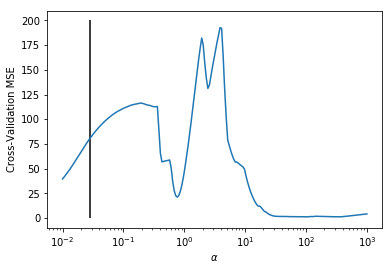

In [76]:
from sklearn.metrics import mean_squared_error

lassocv = LassoCV(alphas=alpha, cv=10, max_iter=1000000)
lassocv.fit(X_poly[:, 1:], y)
print('Optimal alpha: {}'.format(lassocv.alpha_))
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_poly[:, 1:], y)
print('MSE for optimal alpha: {}'.format(mean_squared_error(lasso.predict(X_poly[:, 1:]), y)))

fig, ax = plt.subplots(1, 1)
ax.semilogx(alpha, lassocv.mse_path_.mean(axis=1))
ax.set(xlabel=r'$\alpha$', ylabel='Cross-Validation MSE')
ax.vlines(lassocv.alpha_, 0, 200)

print('Intercept: {}'.format(lasso.intercept_))
pd.Series(lasso.coef_, index=range(1,11))